In [1]:
# c:\coding stuff\Programming_Stuff\Web_Development\The_Hive_Modules\analyse _pdf\analyse_data.ipynb
! pip install pandas matplotlib seaborn openpyxl


^C


ERROR: Could not find a version that satisfies the requirement openpyxl (from versions: none)
ERROR: No matching distribution found for openpyxl


In [2]:
# c:\coding stuff\Programming_Stuff\Web_Development\The_Hive_Modules\analyse _pdf\analyse_data.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Dataset ===
csv_path = "./CUAD_v1/master_clauses.csv"  # or your specific CSV
df = pd.read_csv(csv_path)

# === Inspect Data ===
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

# === Clean Column Names ===
df.columns = df.columns.str.strip().str.replace('\n', '').str.replace(' ', '_')

# === Handle Missing Values ===
df.fillna("No Data", inplace=True)

# === Example: Convert Answers to Boolean Flags ===
boolean_columns = [col for col in df.columns if "-Answer" in col]
for col in boolean_columns:
    df[col] = df[col].apply(lambda x: True if str(x).lower() in ["yes", "true", "1"] else False)

print(df.head())


Dataset Shape: (510, 83)
Columns: ['Filename', 'Document Name', 'Document Name-Answer', 'Parties', 'Parties-Answer', 'Agreement Date', 'Agreement Date-Answer', 'Effective Date', 'Effective Date-Answer', 'Expiration Date', 'Expiration Date-Answer', 'Renewal Term', 'Renewal Term-Answer', 'Notice Period To Terminate Renewal', 'Notice Period To Terminate Renewal- Answer', 'Governing Law', 'Governing Law-Answer', 'Most Favored Nation', 'Most Favored Nation-Answer', 'Competitive Restriction Exception', 'Competitive Restriction Exception-Answer', 'Non-Compete', 'Non-Compete-Answer', 'Exclusivity', 'Exclusivity-Answer', 'No-Solicit Of Customers', 'No-Solicit Of Customers-Answer', 'No-Solicit Of Employees', 'No-Solicit Of Employees-Answer', 'Non-Disparagement', 'Non-Disparagement-Answer', 'Termination For Convenience', 'Termination For Convenience-Answer', 'Rofr/Rofo/Rofn', 'Rofr/Rofo/Rofn-Answer', 'Change Of Control', 'Change Of Control-Answer', 'Anti-Assignment', 'Anti-Assignment-Answer', 'Re

C:\Users\shibi\AppData\Local\Temp\ipykernel_27324\2123961045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clause_counts.values, y=clause_counts.index, palette="viridis")


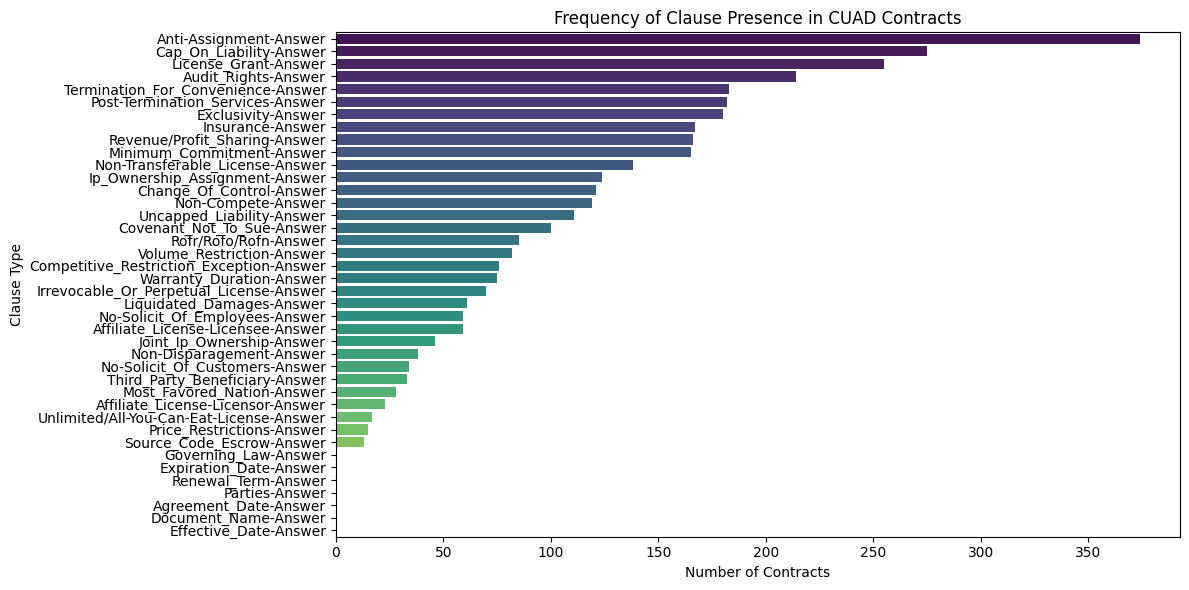

In [3]:
# c:\coding stuff\Programming_Stuff\Web_Development\The_Hive_Modules\analyse _pdf\analyse_data.ipynb
# Count of clauses marked as True
clause_counts = df[boolean_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=clause_counts.values, y=clause_counts.index, palette="viridis")
plt.title("Frequency of Clause Presence in CUAD Contracts")
plt.xlabel("Number of Contracts")
plt.ylabel("Clause Type")
plt.tight_layout()
plt.show()


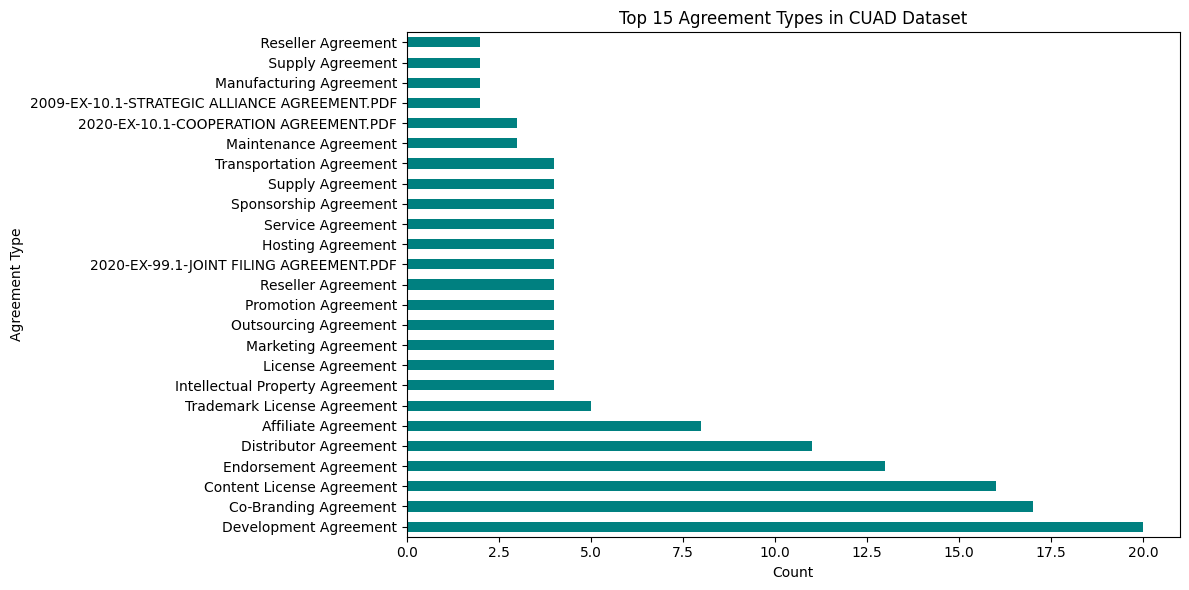

In [7]:
# c:\coding stuff\Programming_Stuff\Web_Development\The_Hive_Modules\analyse _pdf\analyse_data.ipynb
df['Agreement_Type'] = df['Filename'].apply(lambda x: x.split('_')[-1].replace('.pdf','') if isinstance(x,str) else x)

plt.figure(figsize=(12,6))
df['Agreement_Type'].value_counts().head(25).plot(kind='barh', color='teal')
plt.title("Top 15 Agreement Types in CUAD Dataset")
plt.xlabel("Count")
plt.ylabel("Agreement Type")
plt.tight_layout()
plt.show()


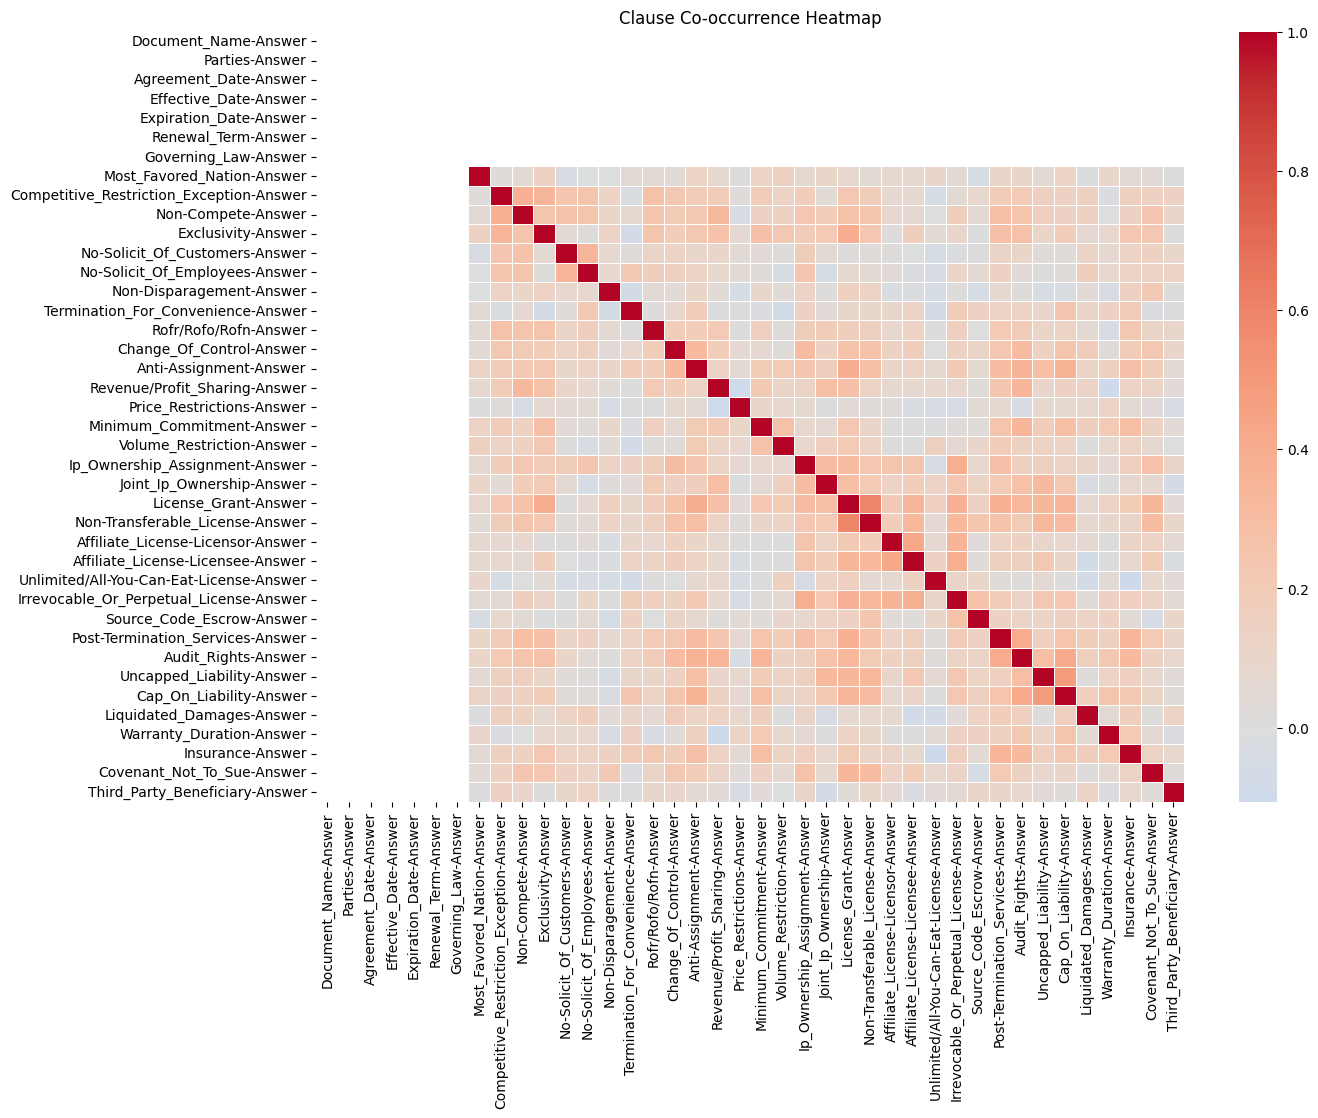

In [6]:
# c:\coding stuff\Programming_Stuff\Web_Development\The_Hive_Modules\analyse _pdf\analyse_data.ipynb
clause_df = df[boolean_columns].astype(int)
corr = clause_df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Clause Co-occurrence Heatmap")
plt.show()


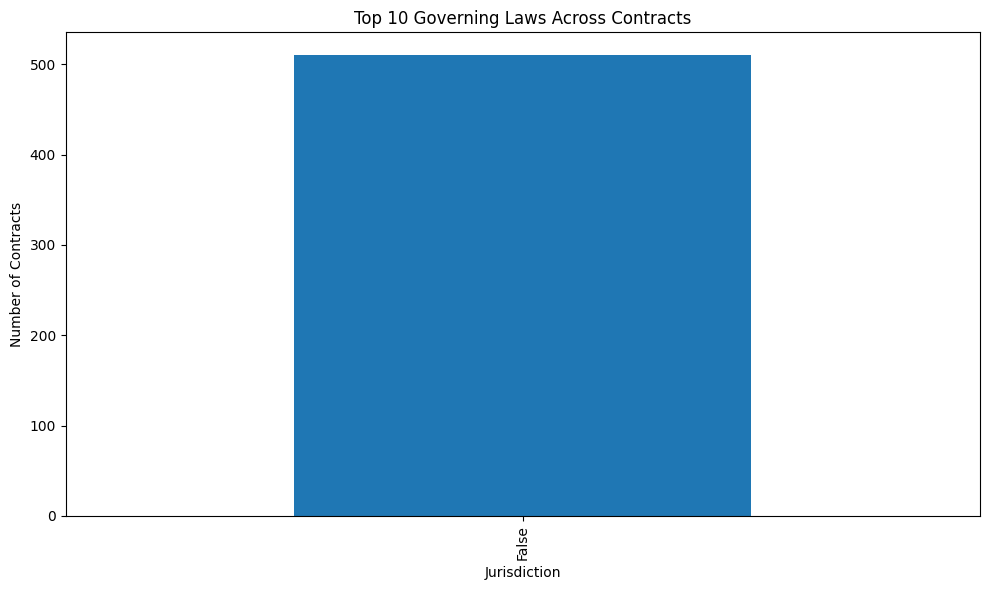

In [8]:
# c:\coding stuff\Programming_Stuff\Web_Development\The_Hive_Modules\analyse _pdf\analyse_data.ipynb
plt.figure(figsize=(10,6))
df['Governing_Law-Answer'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Governing Laws Across Contracts")
plt.ylabel("Number of Contracts")
plt.xlabel("Jurisdiction")
plt.tight_layout()
plt.show()


In [17]:
# c:\coding stuff\Programming_Stuff\Web_Development\The_Hive_Modules\analyse _pdf\analyse_data.ipynb
values_to_replace = ['[]', '[ ]', '{}', '']

df = df.replace(values_to_replace, np.nan)

C:\Users\shibi\AppData\Local\Temp\ipykernel_27324\44372352.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clause_counts.values, y=clause_counts.index, palette="viridis")


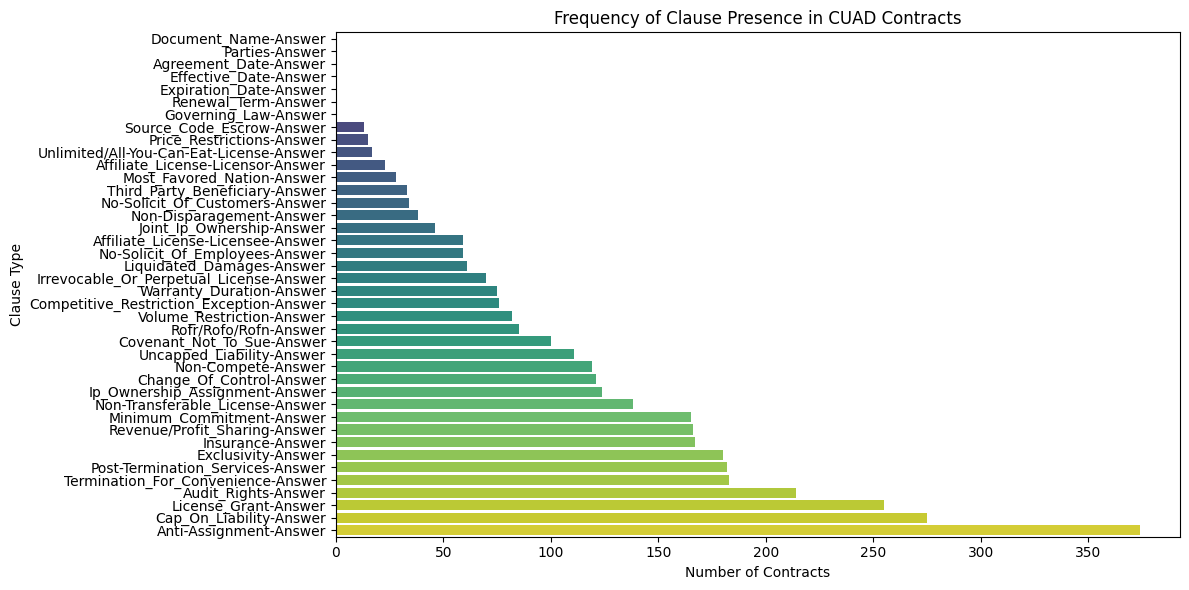

In [21]:
# c:\coding stuff\Programming_Stuff\Web_Development\The_Hive_Modules\analyse _pdf\analyse_data.ipynb
# Count of clauses marked as True
clause_counts = df[boolean_columns].sum().sort_values(ascending=True)

plt.figure(figsize=(12,6))
sns.barplot(x=clause_counts.values, y=clause_counts.index, palette="viridis")
plt.title("Frequency of Clause Presence in CUAD Contracts")
plt.xlabel("Number of Contracts")
plt.ylabel("Clause Type")
plt.tight_layout()
plt.show()

In [ ]:
# c:\coding stuff\Programming_Stuff\Web_Development\The_Hive_Modules\analyse _pdf\analyse_data.ipynb


In [ ]:
# c:\coding stuff\Programming_Stuff\Web_Development\The_Hive_Modules\analyse _pdf\analyse_data.ipynb


In [ ]:
# c:\coding stuff\Programming_Stuff\Web_Development\The_Hive_Modules\analyse _pdf\analyse_data.ipynb
